Final Project Submission

Please fill out:

    Student name: SHITOTE CLIFF
    Student pace: FULL TIME
    Scheduled project review date/time:
    Instructor name:Nikita Njoroge Lucille Kaleha Samuel karu
    Blog post URL:https://github.com/CliffShitote/dsc-phase-3-choosing-a-dataset.git



Introduction

Business Problem:

The stakeholder for this project is SyriaTel, a telecommunications company interested in reducing customer churn and minimizing the loss of revenue associated with customers who terminate their services. The business problem is to build a binary classification model that can predict whether a customer is likely to "soon" stop doing business with SyriaTel. By identifying predictable patterns and factors contributing to customer churn, SyriaTel can take proactive measures to retain customers and mitigate revenue loss.

Dataset:

For this project, I will use a fictional dataset specifically created to simulate customer churn in a telecommunications company like SyriaTel. The dataset includes various features related to customer behavior, account information, and usage patterns.
The dataset includes the following features (not an exhaustive list):

1.CustomerID: Unique identifier for each customer.

2.AccountLength: The length of time the customer has been with SyriaTel.

3.InternationalPlan: Whether the customer has an international calling plan or not.

4.VoiceMailPlan: Whether the customer has a voicemail plan or not.

5.NumberVmailMessages: The number of voicemail messages received by the customer.

6.TotalDayMinutes: Total number of minutes the customer used during the day.

7.TotalEveMinutes: Total number of minutes the customer used during the evening.

8.TotalNightMinutes: Total number of minutes the customer used during the night.

9.TotalIntlMinutes: Total number of international minutes used by the customer.

10.TotalDayCalls: Total number of calls made by the customer during the day.

11.TotalEveCalls: Total number of calls made by the customer during the evening.

12.TotalNightCalls: Total number of calls made by the customer during the night.

13.TotalIntlCalls: Total number of international calls made by the customer.

14.CustomerServiceCalls: Number of customer service calls made by the customer.

15.Churn: Binary indicator of whether the customer churned or not.

The objective is to build a binary classification model that can predict whether a customer is likely to churn "soon" based on the available features. By identifying predictable patterns and factors associated with customer churn, SyriaTel can take proactive actions such as targeted retention strategies, improved customer service, or personalized offers to mitigate customer churn and reduce revenue loss.

Data Understanding

Here we are exploring our dataset by loading it and viewing various columns and rows in it.

We then clean the dataset by:

(i) Obtaining information from the dataset.

(ii) Checking for missing values.

(iii) Checking for duplicates.

(iv)Checking for the outliers.

(v)Checking for correct data types.


We defined functions to explore our data.

Exploring the dataset

Import module & package

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
import plotly.express as px
import plotly.graph_objects as go
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline as imbPipeline
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import train_test_split, GridSearchCV
from imblearn.over_sampling import SMOTE
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn import svm
from sklearn.metrics import roc_auc_score, roc_curve, classification_report, confusion_matrix


In [2]:
# Load the dataset
df = pd.read_csv('bigml_59c28831336c6604c800002a.csv')
df

state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes                     25              265.1   
1                yes                     26              161.6   
2                 no                      0              243.4   
3                 no                      0              299.4   
4                 no                      0              166.7   
...              ...                    ...                ...   
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
0                 110             45.07  ...               99   
1                 123             27.47  ...              103   
2                 114             41.38  ...              110   
3                  71             50.90  ...               88   
4                 113             28.34  ...              122   
...               ...               ...  ...              ...   
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
0                16.78                244.7                 91   
1                16.62                254.4                103   
2                10.30                162.6                104   
3                 5.26                196.9                 89   
4                12.61                186.9                121   
...                ...                  ...                ...   
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
0                  11.01                10.0                 3   
1                  11.45                13.7                 3   
2                   7.32                12.2                 5   
3                   8.86                 6.6                 7   
4                   8.41                10.1                 3   
...                  ...                 ...               ...   
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86           

In [3]:
#Display the first few rows in the dataframe
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [4]:
#Display the last few rows in the dataframe
df.tail()

state  account length  area code phone number international plan  \
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
3328             yes                     36              156.2   
3329              no                      0              231.1   
3330              no                      0              180.8   
3331              no                      0              213.8   
3332             yes                     25              234.4   

      total day calls  total day charge  ...  total eve calls  \
3328               77             26.55  ...              126   
3329               57             39.29  ...               55   
3330              109             30.74  ...               58   
3331              105             36.35  ...               84   
3332              113             39.85  ...               82   

      total eve charge  total night minutes  total night calls  \
3328             18.32                279.1                 83   
3329             13.04                191.3                123   
3330             24.55                191.9                 91   
3331             13.57                139.2                137   
3332             22.60                241.4                 77   

      total night charge  total intl minutes  total intl calls  \
3328               12.56                 9.9                 6   
3329                8.61                 9.6                 4   
3330                8.64                14.1                 6   
3331                6.26                 5.0                10   
3332               10.86                13.7                 4   

      total intl charge  customer service calls  churn  
3328               2.67                       2  False  
3329               2.59                       3  False  
3330               3.81                       2  False  
3331               1.35                       2  False  
3332               3.70                       0  False  

[5 rows x 21 columns]

Exploratory data analysis

1.Data Cleaning & Preprocessing: The process of cleaning the data and ensuring its accuracy and readiness for analysis. This involves handling missing values, dealing with outliers, resolving inconsistencies, and transforming the data into a suitable format for analysis.

2.Data Exploration: The process of delving into the data to extract information and insights, aiming to identify patterns and relationships within the data. This may involve summary statistics, visualization techniques, and exploratory data analysis to gain a deeper understanding of the data.

3.Feature Engineering: The process of creating, modifying, or selecting features (variables) from the raw data to enhance the performance of the machine learning model. This can involve techniques such as creating interaction terms, polynomial features, or transforming variables to better represent underlying patterns in the data.

4.Model Selection: The process of choosing the most suitable model for the given problem and dataset. This involves evaluating different algorithms, selecting appropriate evaluation metrics, and comparing the performance of various models. The goal is to select a model that can accurately predict the outcome variable and generalize well to unseen data.

In [5]:
#Display of the number of rows and columns in the dataframe
df.shape

(3333, 21)

As seen the data has:

 3333 rows which are the number of houses sold.

 21 columns which represent the house features.

In [6]:
# Check data types for each columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

Here we check for the descriptive statistics of the dataset.


We first drop the churn column which is not necessary for descriptive statistics.

In [7]:
#summary statistics of the numerical columns in a dataframe
def data_description(df):
    return (df.drop('churn', axis = 1)).describe()
data_description(df)

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

Data Cleaning

Checking for Missing Values

In [8]:
# identify missing 
def identify_missing_values(df):
    """Identify is the data has missing values"""
    # identify if data has missing values(data.isnull().any())
    # empty dict to store missing values
    missing = []
    for i in df.isnull().any():
        # add the bool values to empty list 
        missing.append(i)
    # covert list to set (if data has missing value, the list should have true and false)
    missing_set = set(missing)
    if (len(missing_set) == 1):
        out = print("The Data has no missing values")
    else:
        out = print("The Data has missing values.")

    return out


identify_missing_values(df)

The Data has no missing values


In [9]:
def missing_values(data):
    """A simple function to identify data has missing values"""
    # identify the total missing values per column
    # sort in order 
    miss = df.isnull().sum().sort_values(ascending = False)

    # calculate percentage of the missing values
    percentage_miss = (df.isnull().sum() / len(df)).sort_values(ascending = False)

    # store in a dataframe 
    missing = pd.DataFrame({"Missing Values": miss, "Percentage(%)": percentage_miss})

    # remove values that are missing 
    missing.drop(missing[missing["Percentage(%)"] == 0].index, inplace = True)

    return missing


missing_data = missing_values(df)
missing_data

Empty DataFrame
Columns: [Missing Values, Percentage(%)]
Index: []

This data has no missing values

Checking for duplicates

In [10]:
# Duplicated entries
def identify_duplicates(df):
    """Simple function to identify any duplicates"""
    # identify the duplicates (dataframename.duplicated() , can add .sum() to get total count)
    # empty list to store Bool results from duplicated
    duplicates = []
    for i in df.duplicated():
        duplicates.append(i)
    # identify if there is any duplicates. (If there is any we expect a True value in the list duplicates)
    duplicates_set = set(duplicates) 
    if (len(duplicates_set) == 1):
        print("The Data has no duplicates")
    else:
        no_true = 0
        for val in duplicates:
            if (val == True):
                no_true += 1
        # percentage of the data represented by duplicates 
        duplicates_percentage = np.round(((no_true / len(data)) * 100), 3)
        print(f"The Data has {no_true} duplicated rows.\nThis constitutes {duplicates_percentage}% of the data set.") 



identify_duplicates(df)

The Data has no duplicates


In [11]:
# Check duplicate data
df.duplicated().sum()

0

In [12]:
# Create function to explore the data
def check_mydata(dataframe: pd.DataFrame):

    new_col = {
        'col_name': [],
        'null_pct': [],
        'data_type': [],
        'unique_values': [],
        'unique_values_count': [],
        'mean_med_std': []
    }

    for col in dataframe.columns:
        new_col['col_name'].append(col)
        new_col['null_pct'].append(dataframe[col].isna().sum() / dataframe[col].shape[0] * 100) 
        new_col['data_type'].append(dataframe[col].dtypes)
        (dataframe[col].unique())
        if dataframe[col].dtypes == 'object':
            new_col['unique_values'].append(dataframe[col].unique())
            new_col['unique_values_count'].append(dataframe[col].nunique())
            new_col['mean_med_std'].append('-')

        else:
            new_col['unique_values'].append('-')
            new_col['unique_values_count'].append('-')
            mean = round(dataframe[col].mean(), 2)
            median = round(dataframe[col].median(), 2)
            std = round(dataframe[col].std(), 2)
            new_col['mean_med_std'].append((mean, median, std))

    return pd.DataFrame(data=new_col)

In [13]:
df['area code'].replace({100.62:415, 100.0:408, 39.56:510}, inplace = True)

In [14]:
check_mydata(df)

col_name  null_pct data_type  \
0                    state       0.0    object   
1           account length       0.0     int64   
2                area code       0.0     int64   
3             phone number       0.0    object   
4       international plan       0.0    object   
5          voice mail plan       0.0    object   
6    number vmail messages       0.0     int64   
7        total day minutes       0.0   float64   
8          total day calls       0.0     int64   
9         total day charge       0.0   float64   
10       total eve minutes       0.0   float64   
11         total eve calls       0.0     int64   
12        total eve charge       0.0   float64   
13     total night minutes       0.0   float64   
14       total night calls       0.0     int64   
15      total night charge       0.0   float64   
16      total intl minutes       0.0   float64   
17        total intl calls       0.0     int64   
18       total intl charge       0.0   float64   
19  customer service calls       0.0     int64   
20                   churn       0.0      bool   

                                        unique_values unique_values_count  \
0   [KS, OH, NJ, OK, AL, MA, MO, LA, WV, IN, RI, I...                  51   
1                                                   -                   -   
2                                                   -                   -   
3   [382-4657, 371-7191, 358-1921, 375-9999, 330-6...                3333   
4                                           [no, yes]                   2   
5                                           [yes, no]                   2   
6                                                   -                   -   
7                                                   -                   -   
8                                                   -                   -   
9                                                   -                   -   
10                                                  -                   -   
11                                                  -                   -   
12                                                  -                   -   
13                                                  -                   -   
14                                                  -                   -   
15                                                  -                   -   
16                                                  -                   -   
17                                                  -                   -   
18                                                  -                   -   
19                                                  -                   -   
20                                                  -                   -   

              mean_med_std  
0                        -  
1   (101.06, 101.0, 39.82)  
2   (437.18, 415.0, 42.37)  
3                        -  
4                        -  
5                        -  
6        (8.1, 0.0, 13.69)  
7   (179.78, 179.4, 54.47)  
8   (100.44, 101.0, 20.07)  
9      (30.56, 30.5, 9.26)  
10  (200.98, 201.4, 50.71)  
11  (100.11, 100.0, 19.92)  
12    (17.08, 17.12, 4.31)  
13  (200.87, 201.2, 50.57)  
14  (100.11, 100.0, 19.57)  
15      (9.04, 9.05, 2.28)  
16     (10.24, 10.3, 2.79)  
17       (4.48, 4.0, 2.46)  
18      (2.76, 2.78, 0.75)  
19       (1.56, 1.0, 1.32)  
20       (0.14, 0.0, 0.35)

If the dataset you are working with, "Churn in Telecoms," does not contain any duplicate values or missing/null values, then you may not need to perform extensive data cleaning. However, it's still recommended to conduct further data exploration to understand the dataset and perform any necessary preprocessing steps before training the classification model.

In [15]:
#summary statistics of the numerical columns in a dataframe
df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

Data Exploration

Univariate analysis

In [16]:
# Analysis target prediciton
df['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [17]:
df['churn'] = df['churn'].replace({'yes': 1, 'no':0}).astype('int') 
df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1      0  
1                       1      0  
2                       0      0  
3                       2      0  
4                       3      0  

[5 rows x 21 columns]

In [18]:
chrun_prop = df['churn'].value_counts().to_frame()
fig = px.bar(data_frame=chrun_prop, x=chrun_prop.index, y='churn', color=['Not_churn', 'churn'])
fig.update_layout(
    width=700, 
    height=600, 
    legend=dict(title=' '),
    xaxis=dict(tickvals=[0,1], ticktext=['Not churn', 'churn'], title='Status', title_font=dict(size=20)),
    yaxis=dict(title='Total Counts', title_font=dict(size=20))
)
fig.update_traces(
    hovertemplate='Status: %{x}<br>Total Counts: %{y}',
)
fig.show()

churn = df['churn'].value_counts()
transuction = churn.index
quantity = churn.values



The ratio between the number of churned customers and non-churned customers in the above graph clearly shows a significant imbalance in the data. This imbalance can have a considerable impact on the performance of the machine learning model. Therefore, in the modeling stage, we will address this data imbalance by generating synthetic data using the SMOTE method or Random Oversampling.

In [19]:
# Analysis categorical data
df.describe(exclude=['float', 'int'])

state phone number international plan voice mail plan
count   3333         3333               3333            3333
unique    51         3333                  2               2
top       WV     382-4657                 no              no
freq     106            1               3010            2411

The describe() function is used to display insights about numerical or categorical data, providing statistical summaries such as count, mean, standard deviation, minimum and maximum values, and quartile ranges. It is a quick and useful way to understand the distribution and basic statistics of the data.

In [20]:
# Analysis categorical data values
categorical_col = [col for col in df.columns if df[col].dtypes == 'object']

for col in categorical_col:
    temp_data = df[col].value_counts().to_frame()
    if col == 'state':
        fig = px.bar(data_frame=temp_data, x=temp_data.index, y=col)
        tickangle=45
    else:
        fig = px.bar(data_frame=temp_data, x=temp_data.index, y=col, color=temp_data.index)
        tickangle=0
    fig.update_layout(
        width=700, 
        height=600, 
        legend=dict(title=' ', ),
        xaxis_tickangle=tickangle,
        xaxis=dict(title=col, title_font=dict(size=20)),
        yaxis=dict(title='Total Counts', title_font=dict(size=20))
    )
    fig.update_traces(
        hovertemplate='Type: %{x}<br>Total Counts: %{y}',
    )
    fig.show()

EDA

Categorical Features

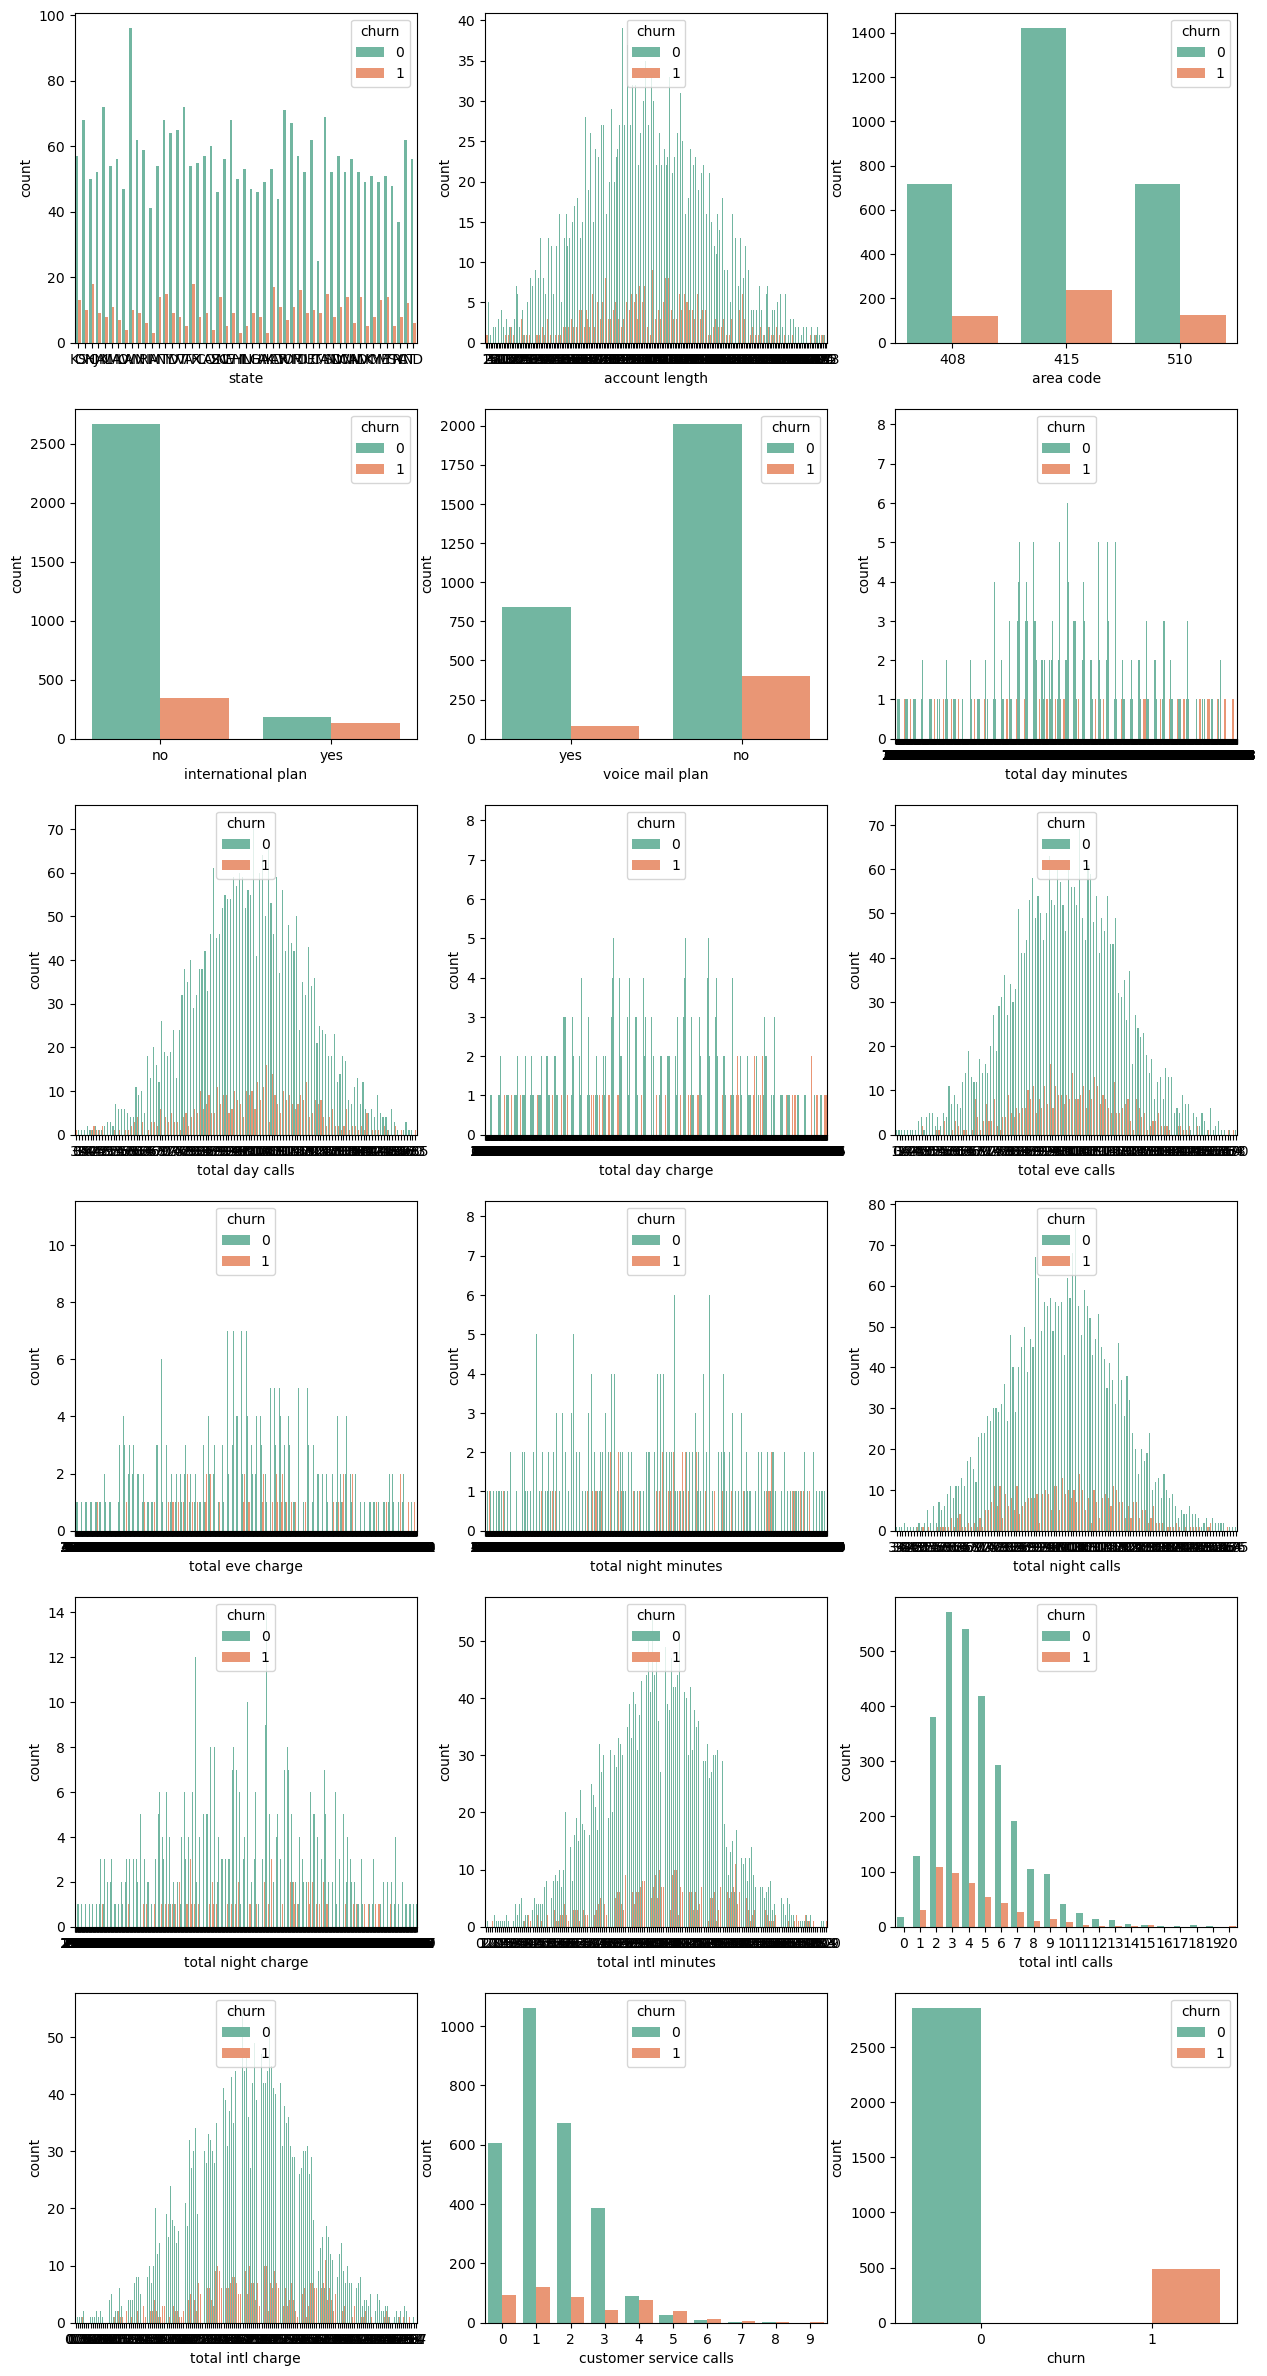

In [21]:
fig,axes=plt.subplots(6,3, figsize=(15, 30))
axes = axes.flatten()

categories =['state','account length','area code','international plan','voice mail plan','total day minutes','total day calls','total day charge',
             'total eve calls','total eve charge','total night minutes','total night calls','total night charge',
             'total intl minutes','total intl calls','total intl charge','customer service calls','churn']

for i in range(len(categories)):
    
    ax= sns.countplot(x=categories[i], data = df, palette = 'Set2', ax=axes[i], hue = 'churn')

The insight we can gather from the analysis is that the state with state code WV has the highest number of total users for the telecommunications provider being analyzed, while the state with state code CA has the lowest number of users.

Another insight we can gather is that the distribution of the number of users for the telecommunications provider being analyzed is highest in the area code 415, while the distribution in other area codes is not significantly different from each other.

Additionally, we can see that only a small portion of the total users are using the international plan service, and only a small portion are using the voice mail plan service.

Noticeable Trends:

Sensior Citizens: most customers are not Senior Citizens.
InternetService: higher churn rate for customers using Fiber Optic.
OnlineSecurity: higher churn rate for customers with no OnlineSecurity.
Contract: higher churn rate for customers unnder Month-to-Month Contract.

Bivariate data analysis

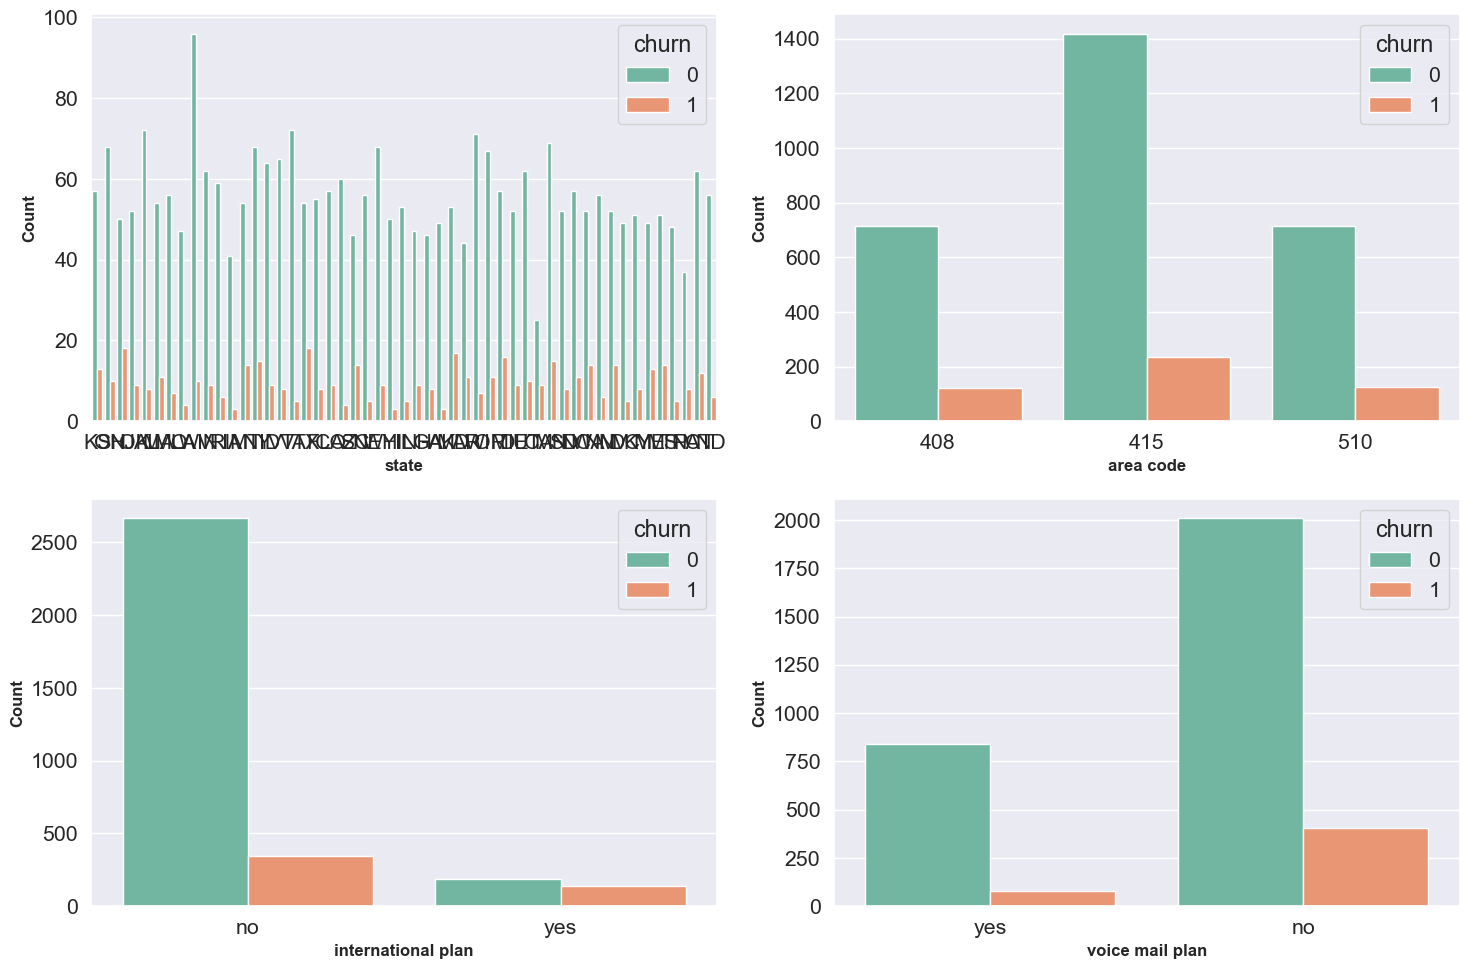

In [60]:
fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

categories = ['state', 'area code', 'international plan', 'voice mail plan']

for i, category in enumerate(categories):
    ax = sns.countplot(x=category, data=df, palette='Set2', ax=axes[i], hue='churn')
    ax.set_xlabel(category, fontdict=dict(fontsize=12, fontweight='bold'))
    ax.set_ylabel('Count', fontdict=dict(fontsize=12, fontweight='bold'))

plt.tight_layout()
plt.show()

Through the process of univariate and bivariate analysis, we obtained more specific insights regarding customers who are at risk of churn and not churn based on the categories of location, area, and service type of each customer type. Looking at the distribution visualization of the categorical columns, the data per category appears to be uniform or consistent, making it less suitable to be included in a machine learning model because the patterns in each category are almost similar. However, to decide whether to include them in the model or not, further calculations will be performed using the WoE and Information Value methods.

In [22]:
numerical_col = df.columns.to_list()

for col in categorical_col:
    numerical_col.remove(col)
    print(col)

print(numerical_col, len(numerical_col))

state
phone number
international plan
voice mail plan
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls', 'churn'] 17


In [23]:
temp_data = df[numerical_col]
temp_data.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls        churn  
count        3333.000000             3333.000000  3333.000000  
mean            2.764581                1.562856     0.144914  
std             0.753773                1.315491     0.352067  
min             0.000000                0.000000     0.000000  
25%             2.300000                1.000000     0.000000  
50%             2.780000                1.000000     0.000000  
75%             3.270000                2.000000     0.000000  
max             5.400000                9.000000     1.000000

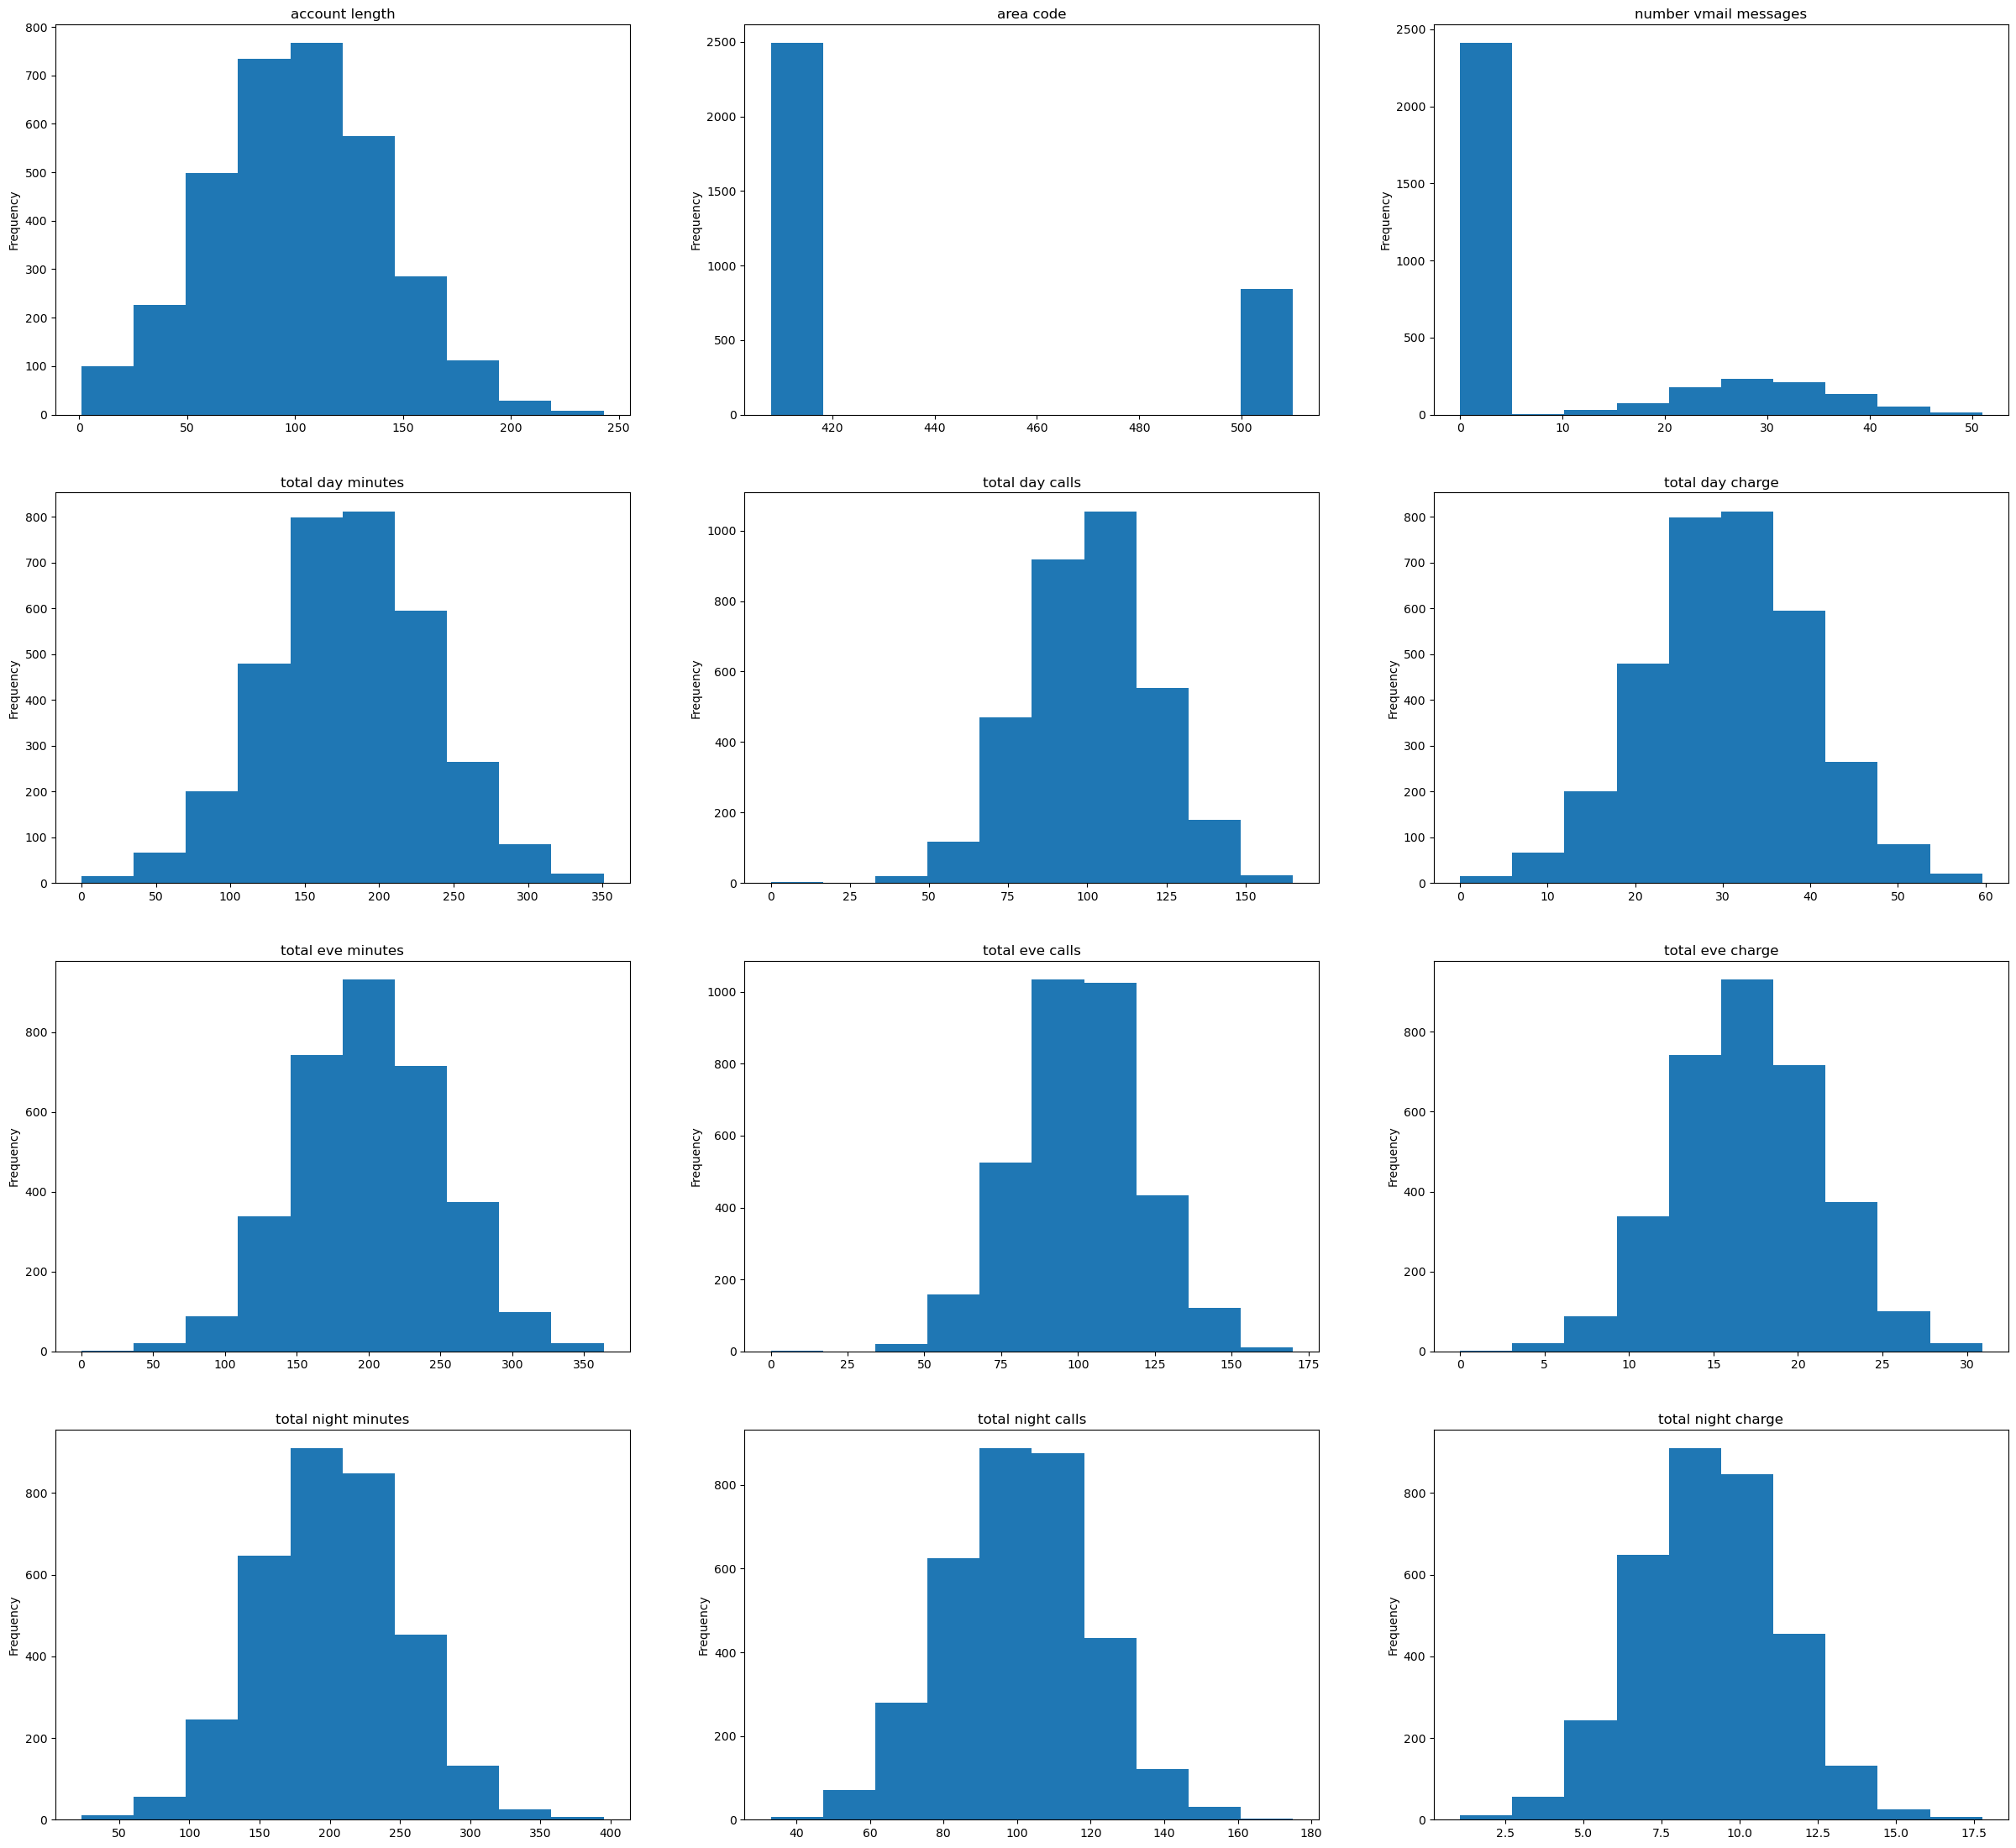

In [24]:
# Analysis numerical data
# Check data distribution
num = 1
plt.figure(figsize=(30, 35))
for col in numerical_col[:12]:   
    plt.subplot(5, 3, num)
    temp_data[col].plot(kind='hist')
    plt.title(col, pad=5)
    num+=1

In [25]:
df[numerical_col[:-1]].skew()

account length            0.096606
area code                 1.126823
number vmail messages     1.264824
total day minutes        -0.029077
total day calls          -0.111787
total day charge         -0.029083
total eve minutes        -0.023877
total eve calls          -0.055563
total eve charge         -0.023858
total night minutes       0.008921
total night calls         0.032500
total night charge        0.008886
total intl minutes       -0.245136
total intl calls          1.321478
total intl charge        -0.245287
customer service calls    1.091359
dtype: float64

Checking for outliers

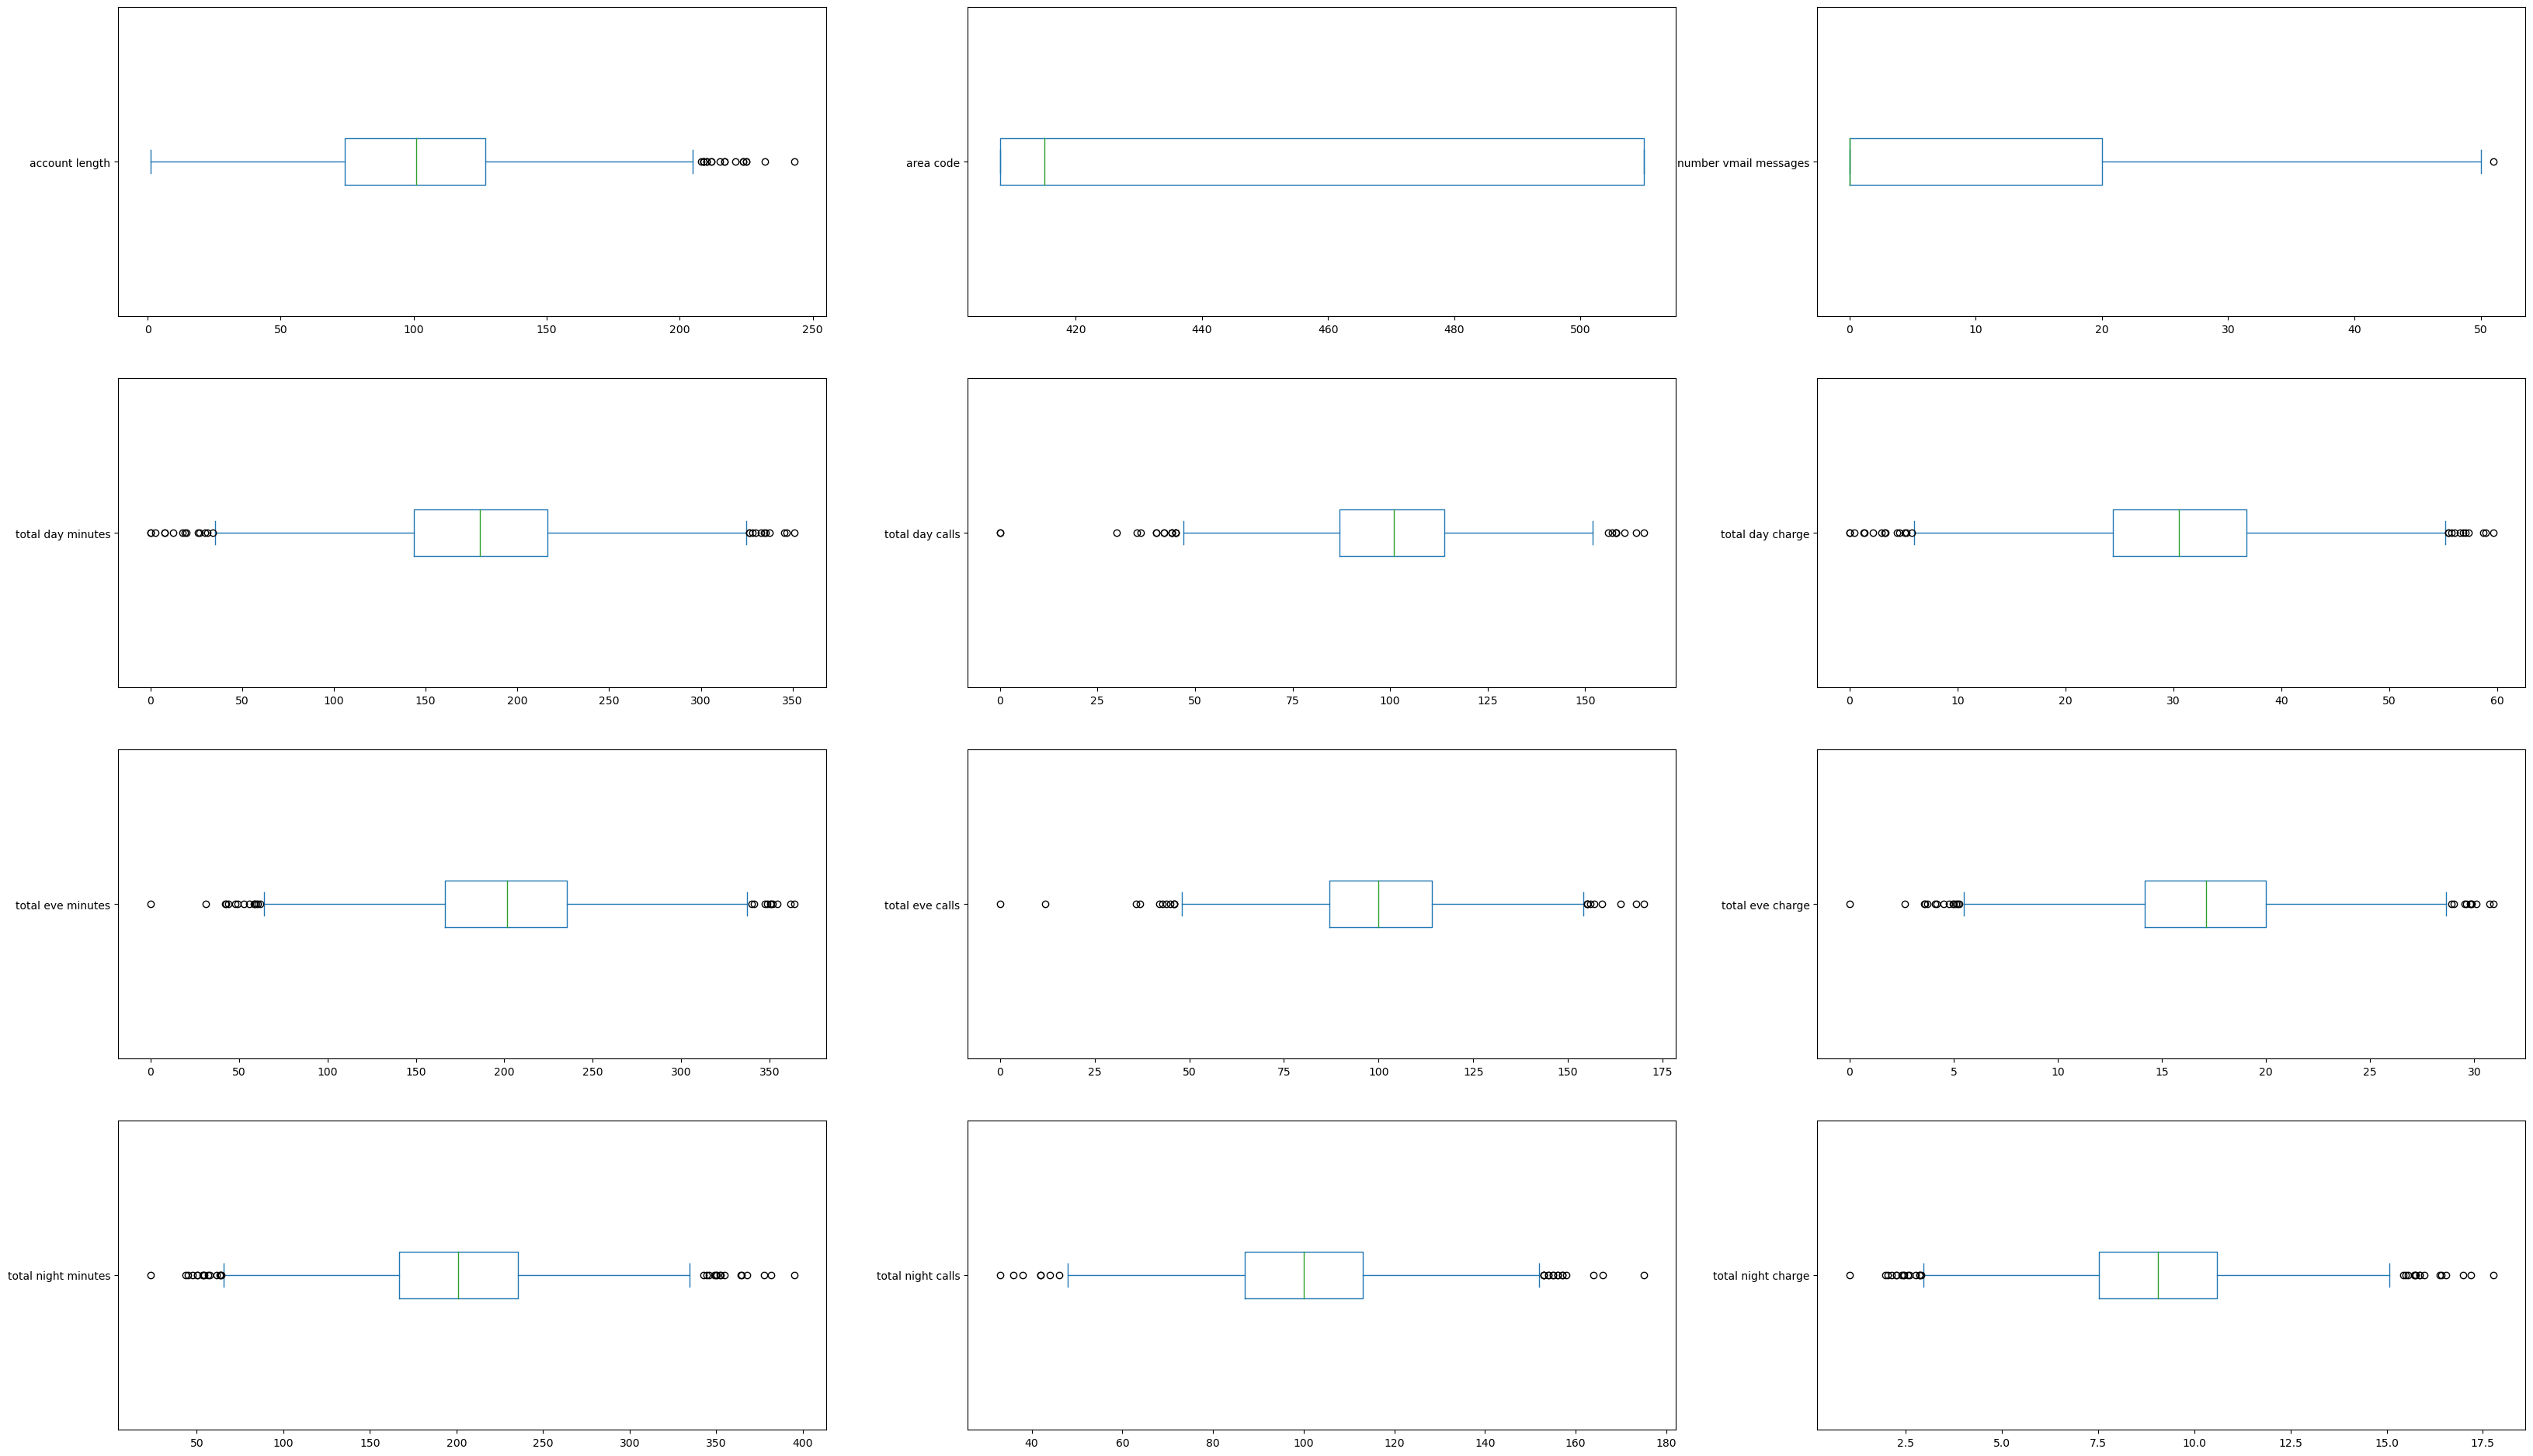

In [26]:
# Analysis numerical data
# Check data outlier
temp_data = df[numerical_col]

num = 1
plt.figure(figsize=(40, 30))
for col in numerical_col[:12]:
    plt.subplot(5, 3, num)
    temp_data[col].plot(kind='box', vert=False)
    num+=1

From the majority of the numerical data, it appears that most of the data follows a normal distribution and contains outlier values. However, in this case, the outlier values will not be removed because doing so may result in the loss of valuable information for training the machine learning model.

Outliers can sometimes provide important insights or represent unique instances within the data. Removing them without careful consideration can lead to the loss of valuable information or distort the representation of the underlying patterns in the data. It is important to handle outliers appropriately, considering the context and objectives of the analysis.

Instead of removing the outliers, alternative approaches can be used, such as transforming the data, robust statistical techniques, or utilizing outlier-robust models. These methods can help mitigate the impact of outliers on the model while still retaining the valuable information they may contain.

It is crucial to carefully evaluate the effect of outliers on the model's performance and consider the trade-offs between outlier removal and the potential loss of meaningful insights.

In [27]:
# Check Correlations
corr_df = temp_data.corr()
corr_df

account length  area code  number vmail messages  \
account length                1.000000  -0.012463              -0.004628   
area code                    -0.012463   1.000000              -0.001994   
number vmail messages        -0.004628  -0.001994               1.000000   
total day minutes             0.006216  -0.008264               0.000778   
total day calls               0.038470  -0.009646              -0.009548   
total day charge              0.006214  -0.008264               0.000776   
total eve minutes            -0.006757   0.003580               0.017562   
total eve calls               0.019260  -0.011886              -0.005864   
total eve charge             -0.006745   0.003607               0.017578   
total night minutes          -0.008955  -0.005825               0.007681   
total night calls            -0.013176   0.016522               0.007123   
total night charge           -0.008960  -0.005845               0.007663   
total intl minutes            0.009514  -0.018288               0.002856   
total intl calls              0.020661  -0.024179               0.013957   
total intl charge             0.009546  -0.018395               0.002884   
customer service calls       -0.003796   0.027572              -0.013263   
churn                         0.016541   0.006174              -0.089728   

                        total day minutes  total day calls  total day charge  \
account length                   0.006216         0.038470          0.006214   
area code                       -0.008264        -0.009646         -0.008264   
number vmail messages            0.000778        -0.009548          0.000776   
total day minutes                1.000000         0.006750          1.000000   
total day calls                  0.006750         1.000000          0.006753   
total day charge                 1.000000         0.006753          1.000000   
total eve minutes                0.007043        -0.021451          0.007050   
total eve calls                  0.015769         0.006462          0.015769   
total eve charge                 0.007029        -0.021449          0.007036   
total night minutes              0.004323         0.022938          0.004324   
total night calls                0.022972        -0.019557          0.022972   
total night charge               0.004300         0.022927          0.004301   
total intl minutes              -0.010155         0.021565         -0.010157   
total intl calls                 0.008033         0.004574          0.008032   
total intl charge               -0.010092         0.021666         -0.010094   
customer service calls          -0.013423        -0.018942         -0.013427   
churn                            0.205151         0.018459          0.205151   

                        total eve minutes  total eve calls  total eve charge  \
account length                  -0.006757         0.019260         -0.006745   
area code                        0.003580        -0.011886          0.003607   
number vmail messages            0.017562        -0.005864          0.017578   
total day minutes                0.007043         0.015769          0.007029   
total day calls                 -0.021451         0.006462         -0.021449   
total day charge                 0.007050         0.015769          0.007036   
total eve minutes                1.000000        -0.011430          1.000000   
total eve calls                 -0.011430         1.000000         -0.011423   
total eve charge                 1.000000        -0.011423          1.000000   
total night minutes             -0.012584        -0.002093         -0.012592   
total night calls                0.007586         0.007710          0.007596   
total night charge              -0.012593        -0.002056         -0.012601   
total intl minutes              -0.011035         0.008703         -0.011043   
total intl calls                 0.002541         0.017434          0.002541   
total intl cha

 Heatmap Correlation

In [28]:
# features correlation with traget variable (churn)

corr_df_target = corr_df['churn'].to_frame()

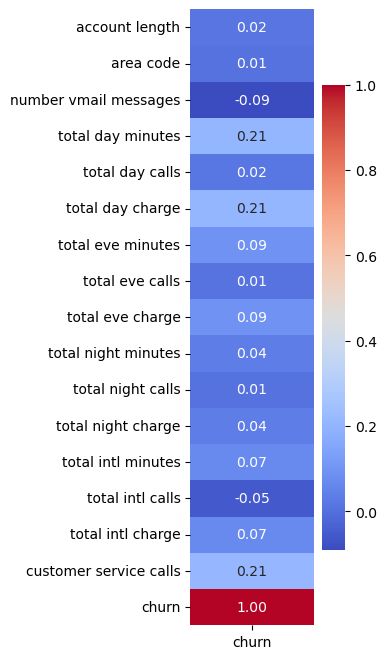

In [29]:
plt.figure(figsize = (2, 8))
corr_target_hm = sns.heatmap(
                corr_df_target, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm"

)


From the visualization above, there doesn't appear to be any significant correlation between the features and the target prediction.

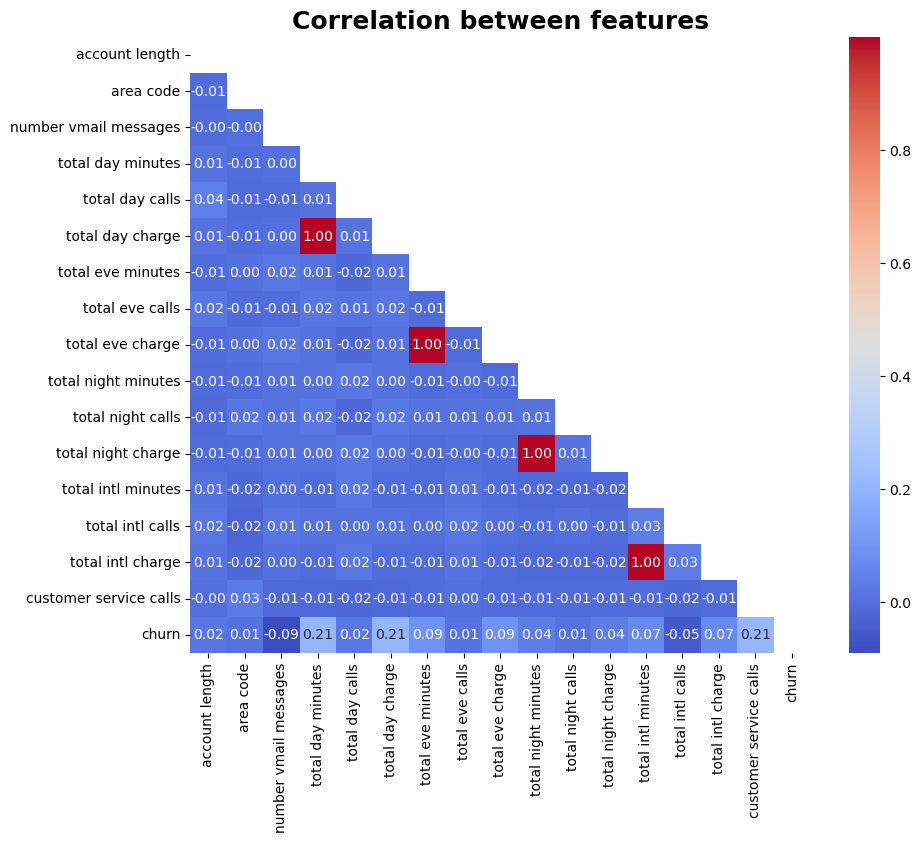

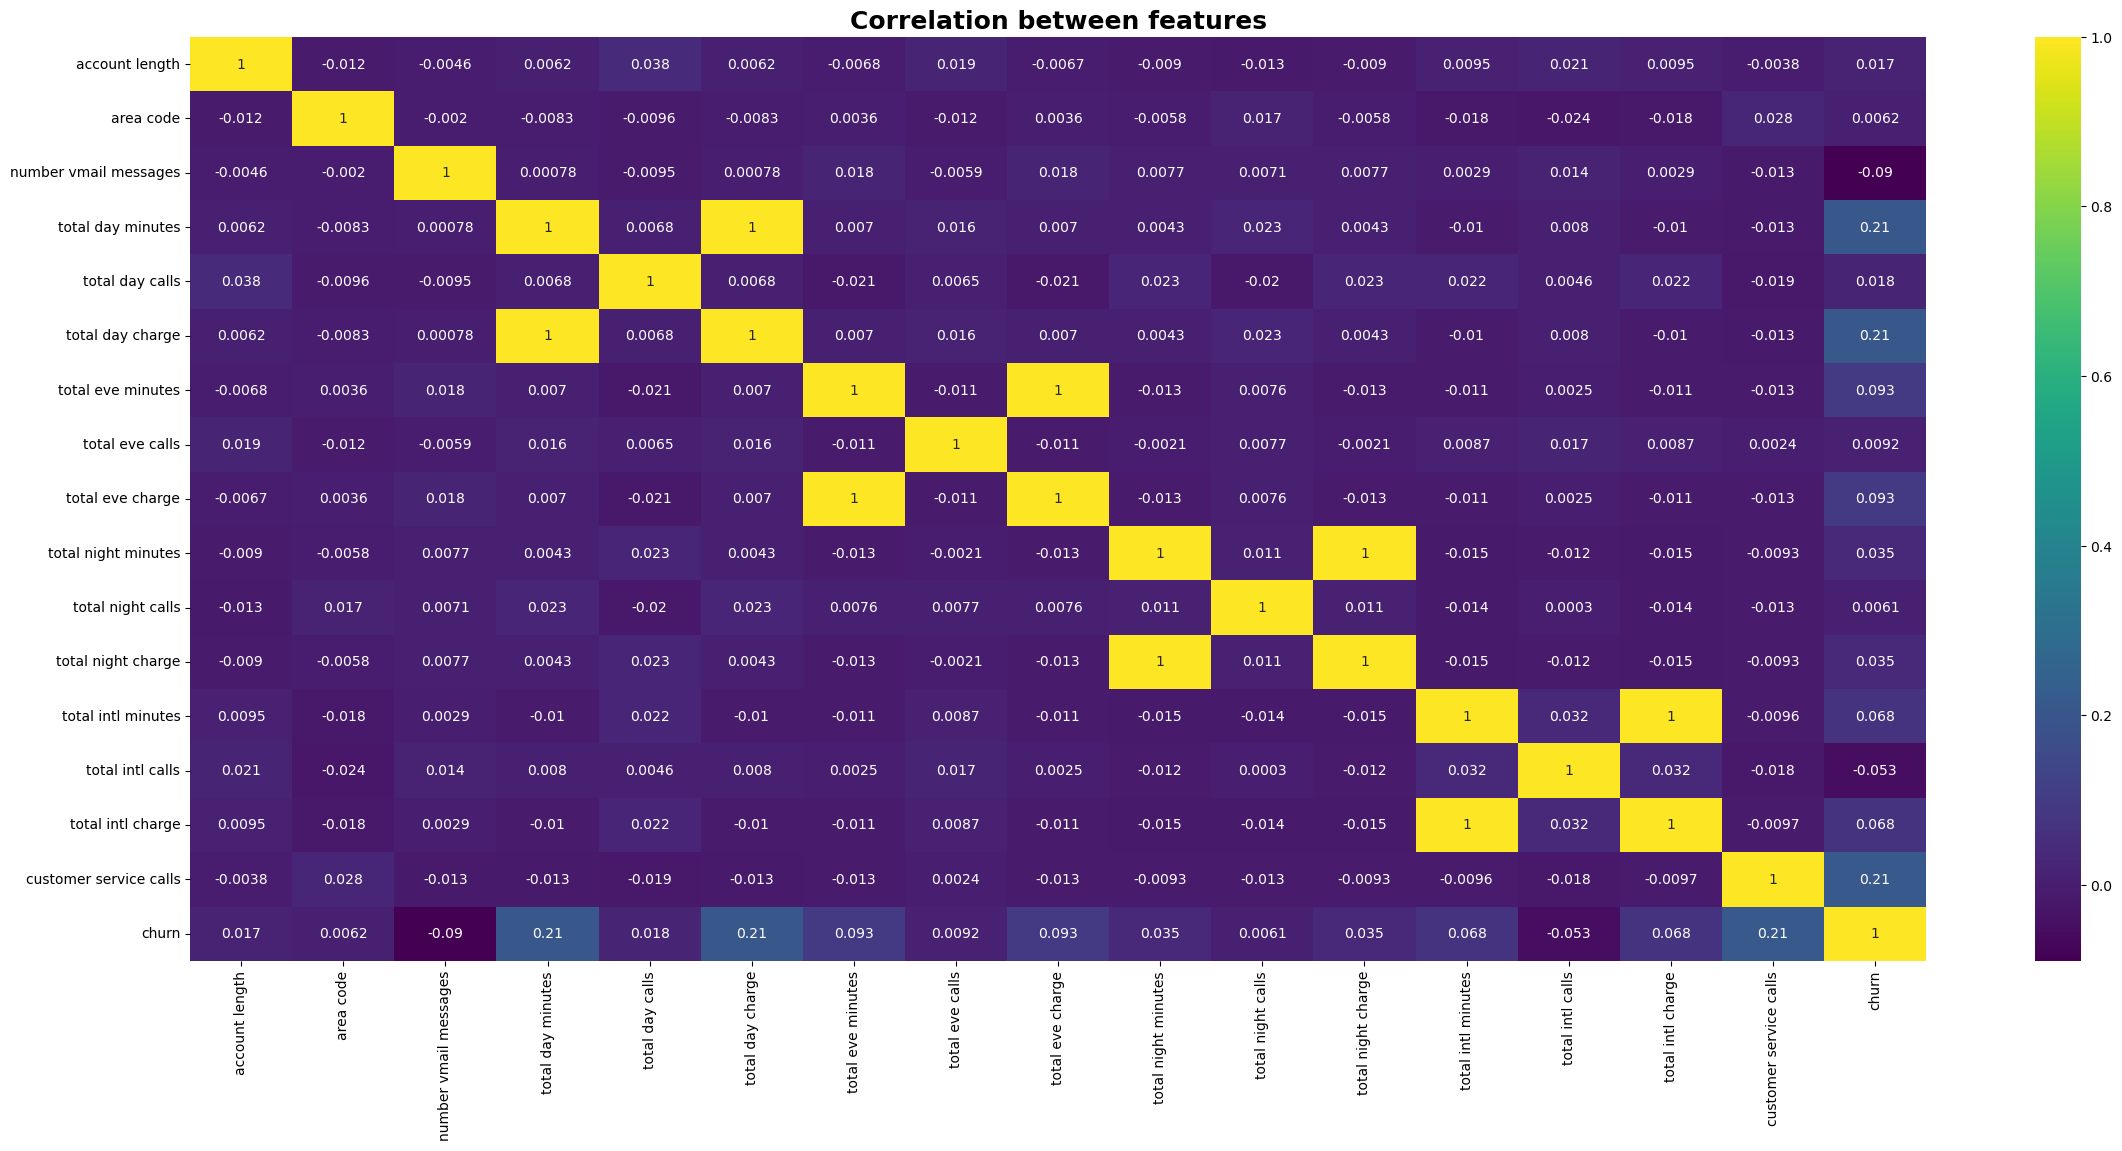

In [30]:
# Lets create a heatmap to check for correlations
plt.figure(figsize = (10, 8))
corr_all_hm = sns.heatmap(
                corr_df, 
                annot=True, 
                fmt=".2f",
                cmap="coolwarm",
                mask=np.triu(np.ones_like(corr_df, dtype=bool)),
                annot_kws={"size": 10}
            )
plt.title("Correlation between features",weight='bold',fontsize=18)
plt.show()

fig, ax = plt.subplots(figsize=(28,12))
ax= sns.heatmap(df.corr(), annot=True, cmap="viridis")
plt.title("Correlation between features",weight='bold',fontsize=18);


Overall, among the features, there are three features that exhibit strong correlation relationships, while the others do not have significant correlation with each other. Therefore, all of these features will be further analyzed using other statistical methods such as calculating mutual information.

It is also important to note that if a feature has a strong correlation with other features and also has a strong correlation with the target prediction, it may be advisable to drop that feature. This is because it can lead to multicollinearity issues and can interfere with the performance of the machine learning model. However, if the feature is essential in explaining the variability in the target prediction and there are no other features that can explain it well, it is recommended not to remove it.

Feature Engineering

In [31]:
# Calculate WoE and IV
def woe_iv_values(dataframe:pd.DataFrame, feature:str, target:str):
    
    dataframe = pd.concat([dataframe.groupby(feature)[target].sum().reset_index(), dataframe.groupby(feature)[target].count().reset_index()], axis=1)
    dataframe = dataframe.iloc[:, [0,1, 3]]
    dataframe.columns = [dataframe.columns.values[0], 'n_good', 'n_observation']

    dataframe['n_bad'] = dataframe['n_observation'] - dataframe['n_good']
    dataframe['bad-rate_pct'] = round((dataframe['n_bad'] / dataframe['n_observation']) * 100, 3)
    dataframe['good_proportion'] = dataframe['n_good'] / dataframe['n_good'].sum()
    dataframe['bad_proportion'] = dataframe['n_bad'] / dataframe['n_bad'].sum()
    dataframe['WoE'] = np.log(dataframe['good_proportion'] / dataframe['bad_proportion'])
    dataframe['IV'] = (dataframe['good_proportion'] - dataframe['bad_proportion'] * dataframe['WoE']).sum()

    return dataframe

In [32]:
# WoE IV -> State
woe_iv_values(df, 'state', target='churn')

state  n_good  n_observation  n_bad  bad-rate_pct  good_proportion  \
0     AK       3             52     49        94.231         0.006211   
1     AL       8             80     72        90.000         0.016563   
2     AR      11             55     44        80.000         0.022774   
3     AZ       4             64     60        93.750         0.008282   
4     CA       9             34     25        73.529         0.018634   
5     CO       9             66     57        86.364         0.018634   
6     CT      12             74     62        83.784         0.024845   
7     DC       5             54     49        90.741         0.010352   
8     DE       9             61     52        85.246         0.018634   
9     FL       8             63     55        87.302         0.016563   
10    GA       8             54     46        85.185         0.016563   
11    HI       3             53     50        94.340         0.006211   
12    IA       3             44     41        93.182         0.006211   
13    ID       9             73     64        87.671         0.018634   
14    IL       5             58     53        91.379         0.010352   
15    IN       9             71     62        87.324         0.018634   
16    KS      13             70     57        81.429         0.026915   
17    KY       8             59     51        86.441         0.016563   
18    LA       4             51     47        92.157         0.008282   
19    MA      11             65     54        83.077         0.022774   
20    MD      17             70     53        75.714         0.035197   
21    ME      13             62     49        79.032         0.026915   
22    MI      16             73     57        78.082         0.033126   
23    MN      15             84     69        82.143         0.031056   
24    MO       7             63     56        88.889         0.014493   
25    MS      14             65     51        78.462         0.028986   
26    MT      14             68     54        79.412         0.028986   
27    NC      11             68     57        83.824         0.022774   
28    ND       6             62     56        90.323         0.012422   
29    NE       5             61     56        91.803         0.010352   
30    NH       9             56     47        83.929         0.018634   
31    NJ      18             68     50        73.529         0.037267   
32    NM       6             62     56        90.323         0.012422   
33    NV      14             66     52        78.788         0.028986   
34    NY      15             83     68        81.928         0.031056   
35    OH      10             78     68        87.179         0.020704   
36    OK       9             61     52        85.246         0.018634   
37    OR      11             78     67        85.897         0.022774   
38    PA       8             45     37        82.222         0.016563   
39    RI       6             65     59        90.769         0.012422   
40    SC      14             60     46        76.667         0.028986   
41    SD       8             60     52        86.667         0.016563   
42    TN       5             53     48        90.566         0.010352   
43    TX      18             72     54        75.000         0.037267   
44    UT      10             72     62        86.111         0.020704   
45    VA       5             77     72        93.506         0.010352   
46    VT       8             73     65        89.041         0.016563   
47    WA      14             66     52        78.788         0.028986   
48    WI       7             78     71        91.026         0.014493   
49    WV      10            106     96        90.566         0.020704   
50    WY       9             77     68        88.312         0.018634   

    bad_proportion       WoE        IV  
0         0.017193 -1.018150  1.105428  
1         0.025263 -0.422167  1.105428  
2         0.015439  0.388763  1.105428  
3         0.021053 -0.932993  1.105428  
4

In [33]:
categorical_col

['state', 'phone number', 'international plan', 'voice mail plan']

In [34]:
# WoE IV -> Area code
woe_iv_values(dataframe=df, feature='area code', target='churn')

area code  n_good  n_observation  n_bad  bad-rate_pct  good_proportion  \
0        408     122            838    716        85.442         0.252588   
1        415     236           1655   1419        85.740         0.488613   
2        510     125            840    715        85.119         0.258799   

   bad_proportion       WoE        IV  
0        0.251228  0.005398  1.000214  
1        0.497895 -0.018818  1.000214  
2        0.250877  0.031089  1.000214

In [35]:
# WoE IV -> International plan
woe_iv_values(dataframe=df, feature='international plan', target='churn')

international plan  n_good  n_observation  n_bad  bad-rate_pct  \
0                 no     346           3010   2664        88.505   
1                yes     137            323    186        57.585   

   good_proportion  bad_proportion       WoE        IV  
0         0.716356        0.934737 -0.266088  1.152831  
1         0.283644        0.065263  1.469292  1.152831

In [36]:
# WoE IV -> Voice mail plan
woe_iv_values(dataframe=df, feature='voice mail plan', target='churn')

voice mail plan  n_good  n_observation  n_bad  bad-rate_pct  \
0              no     403           2411   2008        83.285   
1             yes      80            922    842        91.323   

   good_proportion  bad_proportion       WoE        IV  
0         0.834369        0.704561  0.169100  1.051828  
1         0.165631        0.295439 -0.578696  1.051828

Range of Information Values (IV):

(I).Less than 0.02: Variable has poor predictive power.
(II).0.02 to 0.1: Variable has weak predictive power.
(III).0.1 to 0.3: Variable has moderate predictive power.
(IV).0.3 to 0.5: Variable has strong predictive power.
(V).Greater than 0.5: Variable has very strong predictive power.

However, it should be noted that if the Information Value (IV) is greater than or equal to 1, it is recommended to double-check because such a value is considered too good to be true. In practice, very high IV values like this are rare, especially in complex cases or large datasets.

In [37]:
target_prediction = numerical_col[-1]
numerical_col.remove('churn')
categorical_col

['state', 'phone number', 'international plan', 'voice mail plan']

In [38]:
print(target_prediction)
print(numerical_col)
print(categorical_col)

churn
['account length', 'area code', 'number vmail messages', 'total day minutes', 'total day calls', 'total day charge', 'total eve minutes', 'total eve calls', 'total eve charge', 'total night minutes', 'total night calls', 'total night charge', 'total intl minutes', 'total intl calls', 'total intl charge', 'customer service calls']
['state', 'phone number', 'international plan', 'voice mail plan']


In [39]:
# Calculate Mutual Information
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(df_feature, target_prediction):
    mi_scores = mutual_info_regression(df_feature, target_prediction, random_state = 42)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=df_feature.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

In [40]:
df['total charge'] = df['total day charge'] + df['total eve charge'] + df['total night charge'] + df['total intl charge']
df['total calls'] = df['total day calls'] + df['total eve calls'] + df['total night calls'] + df['total intl calls']
df['total mins'] = df['total day minutes'] + df['total eve minutes'] + df['total night minutes'] + df['total intl minutes']

In [41]:
mi_score = make_mi_scores(df.drop(labels=categorical_col+['churn'], axis=1), df['churn'])
mi_score

total charge              0.102771
total day charge          0.057700
total day minutes         0.053419
total mins                0.045324
customer service calls    0.033289
number vmail messages     0.020252
total intl calls          0.006415
area code                 0.000611
total eve charge          0.000057
total intl minutes        0.000000
total calls               0.000000
total intl charge         0.000000
account length            0.000000
total night charge        0.000000
total night calls         0.000000
total eve calls           0.000000
total eve minutes         0.000000
total day calls           0.000000
total night minutes       0.000000
Name: MI Scores, dtype: float64

The higher the Mutual Information (MI) value, the more information is shared between the two variables (information from the feature to the target prediction), and the more important the variable is in the model.

Based on the various statistical analyses, the conclusion is that categorical features will not be used and will be dropped.

Furthermore, based on the mutual information results, features with a mutual information value of 0 will be dropped.

In [42]:
numerical_col = []

for i in range(len(mi_score)):
    if mi_score.values[i] > 0:
        numerical_col.append(mi_score.index[i])
 
print(numerical_col)

['total charge', 'total day charge', 'total day minutes', 'total mins', 'customer service calls', 'number vmail messages', 'total intl calls', 'area code', 'total eve charge']


In [43]:
# final dataset feature
df_final = df[list(numerical_col)+['churn']]
df_final

total charge  total day charge  total day minutes  total mins  \
0            75.56             45.07              265.1       717.2   
1            59.24             27.47              161.6       625.2   
2            62.29             41.38              243.4       539.4   
3            66.80             50.90              299.4       564.8   
4            52.09             28.34              166.7       512.0   
...            ...               ...                ...         ...   
3328         60.10             26.55              156.2       660.7   
3329         63.53             39.29              231.1       585.4   
3330         67.74             30.74              180.8       675.6   
3331         57.53             36.35              213.8       517.6   
3332         77.01             39.85              234.4       755.4   

      customer service calls  number vmail messages  total intl calls  \
0                          1                     25                 3   
1                          1                     26                 3   
2                          0                      0                 5   
3                          2                      0                 7   
4                          3                      0                 3   
...                      ...                    ...               ...   
3328                       2                     36                 6   
3329                       3                      0                 4   
3330                       2                      0                 6   
3331                       2                      0                10   
3332                       0                     25                 4   

      area code  total eve charge  churn  
0           415             16.78      0  
1           415             16.62      0  
2           415             10.30      0  
3           408              5.26      0  
4           415             12.61      0  
...         ...               ...    ...  
3328        415             18.32      0  
3329        415             13.04      0  
3330        510             24.55      0  
3331        510             13.57      0  
3332        415             22.60      0  

[3333 rows x 10 columns]

Model Selection

In [44]:
X = df_final.drop(['churn'], axis=1)
y = df_final['churn']

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, test_size=0.3, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((2333, 9), (1000, 9), (2333,), (1000,))

In [45]:
X_train

total charge  total day charge  total day minutes  total mins  \
606          57.67             23.72              139.5       571.3   
2468         60.01             24.96              146.8       650.3   
1844         56.33             23.10              135.9       599.4   
3187         70.27             36.02              211.9       702.2   
3083         69.77             40.04              235.5       707.0   
...            ...               ...                ...         ...   
2670         60.90             37.57              221.0       560.0   
2165         61.33             29.10              171.2       605.9   
2988         72.22             44.08              259.3       668.9   
179          73.36             39.46              232.1       725.6   
2762         32.89              8.76               51.5       394.4   

      customer service calls  number vmail messages  total intl calls  \
606                        0                      0                 8   
2468                       1                     41                 2   
1844                       4                     28                 3   
3187                       1                     39                 4   
3083                       0                      0                 5   
...                      ...                    ...               ...   
2670                       2                     12                 6   
2165                       2                      0                 3   
2988                       3                      0                 5   
179                        3                      0                 0   
2762                       3                      0                 4   

      area code  total eve charge  
606         415             24.59  
2468        510             24.28  
1844        510             20.78  
3187        408             23.32  
3083        510             12.10  
...         ...               ...  
2670        510             12.84  
2165        415             20.70  
2988        415             14.89  
179         408             24.85  
2762        408             13.94  

[2333 rows x 9 columns]

In [46]:
y_train

606     0
2468    1
1844    1
3187    0
3083    0
       ..
2670    0
2165    0
2988    0
179     0
2762    0
Name: churn, Length: 2333, dtype: int32

In [47]:
y_train.value_counts(), y_test.value_counts()

(0    1995
 1     338
 Name: churn, dtype: int64,
 0    855
 1    145
 Name: churn, dtype: int64)

In [48]:
from imblearn.over_sampling import RandomOverSampler

handle_imbalance = RandomOverSampler(random_state=42)

In [49]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler


scaler = ColumnTransformer([
    ('numerical_col', MinMaxScaler(), numerical_col)]
)

Logistic Regression

The Logistic Regression model is a simple and interpretable classification algorithm, suitable for binary classification with numerical or categorical features. Despite having some limitations, such as the assumption of linearity and limitations for multi-class classification, logistic regression remains a good choice for many classification problems, especially as a baseline for more complex algorithms.

In [50]:
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from imblearn.pipeline import Pipeline


logreg_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversample', handle_imbalance),
    ('logreg', LogisticRegression())
])

logreg_param = {
    'logreg__penalty': ['l1', 'l2'],
    'logreg__C': [0.1, 1, 10],
    'logreg__solver': ['liblinear', 'saga'],
    'logreg__max_iter': [100, 200, 300],
    'logreg__class_weight': [None, 'balanced']
}

grid_search_logreg = GridSearchCV(estimator=logreg_pipe, param_grid=logreg_param, cv=5, n_jobs=-1, verbose=1)
grid_search_logreg.fit(X_train, y_train)

print('Best parameters :', grid_search_logreg.best_params_)
print('Best Score :', grid_search_logreg.best_score_)

logreg_best_model = grid_search_logreg.best_estimator_
best_model_score = logreg_best_model.score(X_test, y_test)

print('Accuracy : ', best_model_score)

y_pred = logreg_best_model.predict(X_test)
y_pred_proba = logreg_best_model.predict_proba(X_test)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters : {'logreg__C': 0.1, 'logreg__class_weight': None, 'logreg__max_iter': 100, 'logreg__penalty': 'l1', 'logreg__solver': 'saga'}
Best Score : 0.7085267114538053
Accuracy :  0.698
              precision    recall  f1-score   support

           0       0.93      0.70      0.80       855
           1       0.28      0.71      0.41       145

    accuracy                           0.70      1000
   macro avg       0.61      0.70      0.60      1000
weighted avg       0.84      0.70      0.74      1000



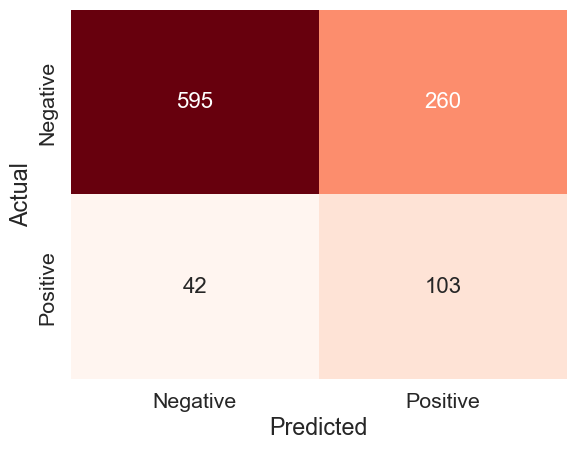

In [51]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)


labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()


Random Forest

Correct! Random Forest is a classification method that combines the power of multiple decision trees to produce better predictions. It works by building an ensemble of decision trees, where each tree is trained on a random subset of the data and a random subset of features.

By combining the predictions of multiple trees, Random Forest reduces the variance and overfitting issues that may occur with individual decision trees. It leverages the concept of "wisdom of the crowd," where the collective decisions of multiple trees can lead to more accurate and robust predictions.

Random Forest also provides additional benefits such as feature importance ranking, which helps in identifying the most influential features for the classification task. It is a popular and effective algorithm for various classification problems, offering good performance and versatility.

In [52]:
rf_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversample', handle_imbalance),
    ('rf', RandomForestClassifier())
])

rf_param = {
    'rf__n_estimators': [100, 200, 300],
    'rf__max_depth': [10, 20, 30, None],
    'rf__min_samples_split': [2, 5, 10],
    'rf__min_samples_leaf': [1, 2, 4],
    'rf__bootstrap': [True, False]
}

grid_search_rf = GridSearchCV(estimator=rf_pipe, param_grid=rf_param, cv=5, n_jobs=-1, verbose=1)
grid_search_rf.fit(X_train, y_train)

print("Best param : ", grid_search_rf.best_params_)
print("Best Score : ", grid_search_rf.best_score_)

rf_best_model = grid_search_rf.best_estimator_
best_model_score = rf_best_model.score(X_test, y_test)

print('Accuracy : ', best_model_score)

y_pred = rf_best_model.predict(X_test)
y_pred_proba = rf_best_model.predict_proba(X_test)
result_report = classification_report(y_true = y_test, y_pred = y_pred)

print(result_report)

Fitting 5 folds for each of 216 candidates, totalling 1080 fits
Best param :  {'rf__bootstrap': False, 'rf__max_depth': 30, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 5, 'rf__n_estimators': 200}
Best Score :  0.9477074928086315
Accuracy :  0.943
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       855
           1       0.97      0.63      0.76       145

    accuracy                           0.94      1000
   macro avg       0.95      0.81      0.86      1000
weighted avg       0.94      0.94      0.94      1000



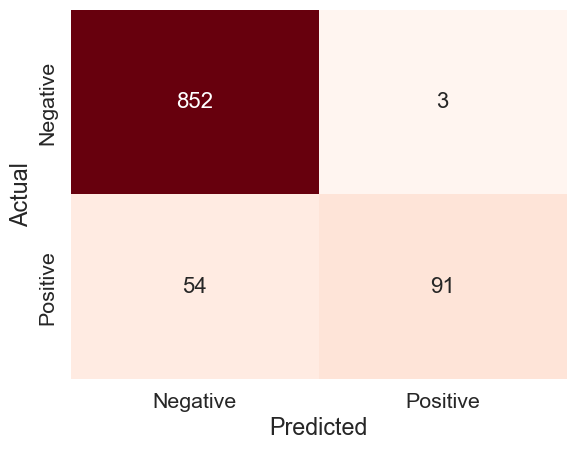

In [53]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

K-Nearest Neighbors (KNN)

 K-Nearest Neighbors (KNN) is a machine learning algorithm used for classification and regression problems. It operates based on the principle of "similarity". In the context of classification, a new object is classified based on the majority class of its k nearest neighbors.

KNN is a non-parametric algorithm, meaning it does not make any assumptions about the underlying data distribution. It is particularly suitable for handling non-linear data and datasets with a small number of features. KNN is often used in scenarios where the decision boundary between classes is not well-defined or linear.

One important aspect of KNN is the choice of the parameter k, which represents the number of nearest neighbors considered for classification. The selection of an appropriate k value can have a significant impact on the performance of the algorithm.

KNN is relatively simple and easy to understand, making it a popular choice for beginners in machine learning. However, it can be computationally expensive, especially when dealing with large datasets, as it requires calculating distances between data points.

In [54]:
knn_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversampling', handle_imbalance),
    ('knn', KNeighborsClassifier())]
)

knn_param = {
    'knn__n_neighbors': [5, 7, 10],
    'knn__weights':['uniform', 'distance'],
    'knn__algorithm': ['ball_tree', 'kd_tree', 'brute'],
    'knn__p': [1, 2]
}

grid_search_knn = GridSearchCV(estimator=knn_pipe, param_grid=knn_param, cv=5, verbose=1, n_jobs=-1)
grid_search_knn.fit(X_train, y_train)

print('Best param : ', grid_search_knn.best_params_)
print('Best Score : ', grid_search_knn.best_score_)

knn_best_model = grid_search_knn.best_estimator_

print('Accuracy : ', knn_best_model.score(X_test, y_test))

y_pred = knn_best_model.predict(X_test)
y_pred_proba = knn_best_model.predict_proba(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)

print(result_report)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best param :  {'knn__algorithm': 'ball_tree', 'knn__n_neighbors': 5, 'knn__p': 2, 'knn__weights': 'distance'}
Best Score :  0.8092711214858792
Accuracy :  0.807
              precision    recall  f1-score   support

           0       0.94      0.83      0.88       855
           1       0.40      0.68      0.50       145

    accuracy                           0.81      1000
   macro avg       0.67      0.75      0.69      1000
weighted avg       0.86      0.81      0.83      1000



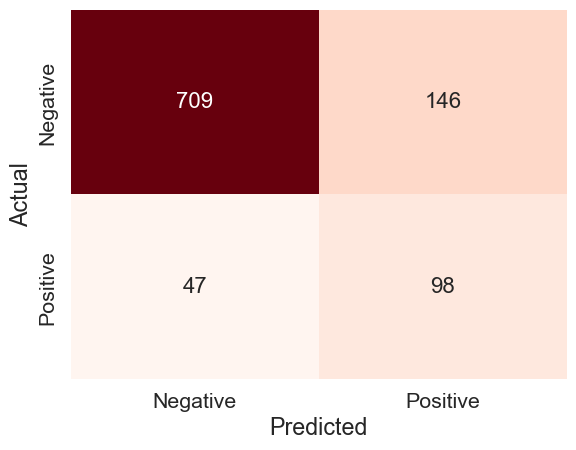

In [55]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

Support Vector Machine

Support Vector Machines (SVM) is a powerful and flexible classification algorithm that works by finding the best hyperplane that separates data into two or more classes. SVM is particularly effective in handling both linear and non-linear classification problems.

In the case of linearly separable data, SVM aims to find a hyperplane that maximizes the margin, which is the distance between the hyperplane and the nearest data points from each class. This allows for a clear separation between classes and helps improve generalization to new data.

SVM can also handle non-linear classification problems by using kernel functions. These functions transform the original feature space into a higher-dimensional space, where a linear hyperplane can be used to separate the data. Some commonly used kernel functions include the linear, polynomial, and radial basis function (RBF) kernels.

One advantage of SVM is its ability to handle high-dimensional data and datasets with complex decision boundaries. It is also less prone to overfitting compared to some other algorithms. However, SVM can be computationally expensive, especially with large datasets, and the selection of appropriate hyperparameters and kernel functions can be crucial for its performance.

Overall, SVM is a versatile algorithm that can be applied to a wide range of classification problems, both linear and non-linear.

In [56]:
svm_pipe = imbPipeline([
    ('scaler', scaler),
    ('oversampling', handle_imbalance),
    ('svm', svm.SVC(probability=True))
])

svm_param = {
    'svm__kernel': ['linear', 'rbf', 'poly'],
    'svm__C': [0.1, 1, 10],
    'svm__gamma': ['scale', 'auto']
}

grid_search_svm = GridSearchCV(estimator=svm_pipe, param_grid=svm_param, cv=5, n_jobs=-1, verbose=1)
grid_search_svm.fit(X_train, y_train)

print("Best param : ", grid_search_svm.best_params_)
print("Best Score : ", grid_search_svm.best_score_)

svm_best_model = grid_search_svm.best_estimator_

print('Accuracy : ', svm_best_model.score(X_test, y_test))

y_pred = svm_best_model.predict(X_test)
y_pred_proba = svm_best_model.predict_proba(X_test)
result_report = classification_report(y_true=y_test, y_pred=y_pred)

print(result_report)

Fitting 5 folds for each of 18 candidates, totalling 90 fits
Best param :  {'svm__C': 10, 'svm__gamma': 'scale', 'svm__kernel': 'rbf'}
Best Score :  0.8864039481302444
Accuracy :  0.867
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       855
           1       0.53      0.69      0.60       145

    accuracy                           0.87      1000
   macro avg       0.74      0.79      0.76      1000
weighted avg       0.88      0.87      0.87      1000



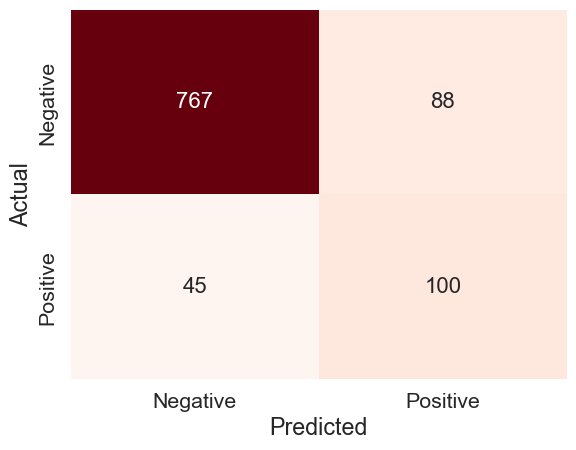

In [57]:
# confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

labels = ['True Negative', 'False Positive', 'False Negative', 'True Positive']

# buat heatmap confusion matrix
sns.set(font_scale=1.4) # atur ukuran font
sns.heatmap(conf_matrix, annot=True, annot_kws={"size": 16}, cmap='Reds', cbar=False, fmt='g')

# tambahkan label axis
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.xticks([0.5, 1.5], ['Negative', 'Positive'])
plt.yticks([0.5, 1.5], ['Negative', 'Positive'])

# tampilkan plot
plt.show()

ROC_AUC Graf

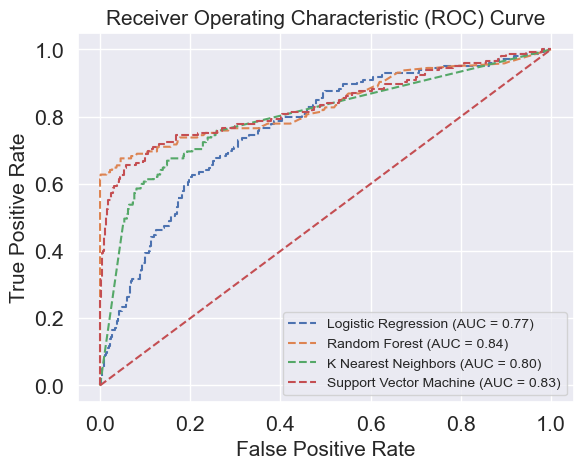

In [58]:
# predict probabilities
logreg_probs = logreg_best_model.predict_proba(X_test)[:, 1]
rf_probs = rf_best_model.predict_proba(X_test)[:, 1]
knn_probs = knn_best_model.predict_proba(X_test)[:, 1]
svm_probs = svm_best_model.predict_proba(X_test)[:, 1]

# calculate roc curves and auc scores
logreg_fpr, logreg_tpr, _ = roc_curve(y_test, logreg_probs)
logreg_auc = roc_auc_score(y_test, logreg_probs)

rf_fpr, rf_tpr, _ = roc_curve(y_test, rf_probs)
rf_auc = roc_auc_score(y_test, rf_probs)

knn_fpr, knn_tpr, _ = roc_curve(y_test, knn_probs)
knn_auc = roc_auc_score(y_test, knn_probs)

svm_fpr, svm_tpr, _ = roc_curve(y_test, svm_probs)
svm_auc = roc_auc_score(y_test, svm_probs)

plt.plot(logreg_fpr, logreg_tpr, linestyle='--', label='Logistic Regression (AUC = %0.2f)' % logreg_auc)
plt.plot(rf_fpr, rf_tpr, linestyle='--', label='Random Forest (AUC = %0.2f)' % rf_auc)
plt.plot(knn_fpr, knn_tpr, linestyle='--', label='K Nearest Neighbors (AUC = %0.2f)' % knn_auc)
plt.plot(svm_fpr, svm_tpr, linestyle='--', label='Support Vector Machine (AUC = %0.2f)' % svm_auc)

# plot the random line
plt.plot([0, 1], [0, 1], linestyle='--', color='r')

# set the axis labels and title
plt.xlabel('False Positive Rate', fontsize=15)
plt.ylabel('True Positive Rate', fontsize=15)
plt.title('Receiver Operating Characteristic (ROC) Curve', fontsize=15)

# show the legend and plot the figure
plt.legend(fontsize=10)
plt.show()

Based on the ROC-AUC scores comparison of the 4 machine learning models, it can be concluded that the Random Forest model performed the best. Therefore, this model will be chosen to make predictions on new data in the future.